In [2]:
rm(list=ls())

In [53]:
# Librerías
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, janitor, srvyr,showtext, stringi)
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)
font_add_google("Poppins", "pop")
showtext_auto()


rlang    (1.1.5 -> 1.1.6) [CRAN]
cli      (3.6.4 -> 3.6.5) [CRAN]
magrittr (2.0.3 -> 2.0.4) [CRAN]
tibble   (3.2.1 -> 3.3.0) [CRAN]
ggplot2  (3.5.1 -> 4.0.0) [CRAN]


Installing 5 packages: rlang, cli, magrittr, tibble, ggplot2

Warning message:
"packages 'tibble', 'ggplot2' are in use and will not be installed"
Installing packages into 'C:/Users/Bryan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Bryan\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\Bryan\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Bryan\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\Bryan\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Bryan\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll  a C:\Users\Bryan\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\Bryan\AppData\Local\Temp\RtmpA7SzZf\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\Bryan\AppData\Local\Temp\RtmpA7SzZf\remotes3cdc21062d9\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/Bryan/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [ ]:
#LÍNEA DE POBREZA EXTREMA POR INGRESOS 
# Promedio trimestral del valor monetario mensual de la Línea de Pobreza Extrema por Ingresos
ut320 <- 1701.39
rt320 <- 1298.6
ut420 <- 1719.75
rt420 <- 1313.92

ut121 <- 1732.14
rt121 <- 1317.79
ut221 <- 1777.32
rt221 <- 1358.6
ut321 <- 1828.63
rt321 <- 1400.08
ut421 <- 1877.13
rt421 <- 1443.29

ut122 <- 1951.74
rt122 <- 1498.46
ut222 <- 1990.99
rt222 <- 1530.41
ut322 <- 2081.04
rt322 <- 1597.57
ut422 <- 2115.73
rt422 <- 1625.32

ut123 <- 2154.34
rt123 <- 1651.91
ut223 <- 2176.94
rt223 <- 1665.47
ut323 <- 2218.76
rt323 <- 1697.79
ut423 <- 2239.99
rt423 <- 1716.25

ut124 <- 2303.21
rt124 <- 1768.38
ut224 <- 2301.81
rt224 <- 1762.85
ut324 <- 2350.35
rt324 <- 1797.26
ut424 <- 2357.49
rt424 <- 1796.86

ut125 <- 2369.937
rt125 <- 1793.537
ut225 <- 2423.766
rt225 <- 1836.754

In [5]:
#CÁLCULO DEL INGRESO DE LOS HOGARES 
    # Periodos (trimestre, año) para los cuales se realiza la estimación

tx <- {c("t320","t420",
         "t121","t221","t321","t421",
         "t122","t222","t322","t422",
         "t123","t223","t323","t423", 
         "t124","t224","t324","t424", 
         "t125","t225")} 

In [6]:
files <- list.files(path = "lista", full.names = TRUE, recursive = TRUE)
files <- files[grepl("coe2|sdem",tolower(files)) & grepl('\\.csv',tolower(files))]

files_coe2 <- files[grepl("coe2",tolower(files))]
files_sdem <- files[grepl("sdem",tolower(files))]

In [7]:
cat("Archivos encontrados en carpeta 'lista':\n")
print(basename(files))

Archivos encontrados en carpeta 'lista':
 [1] "COE2T116.csv"       "COE2T117.csv"       "COE2T118.csv"      
 [4] "coe2t119.csv"       "COE2T216.csv"       "COE2T217.csv"      
 [7] "COE2T218.csv"       "coe2t219.csv"       "COE2T316.csv"      
[10] "COE2T317.csv"       "COE2T318.csv"       "coe2t319.csv"      
[13] "COE2T416.csv"       "COE2T417.csv"       "COE2T418.csv"      
[16] "coe2t419.csv"       "ENOE_COE2T120.csv"  "ENOE_COE2T123.csv" 
[19] "ENOE_COE2T124.csv"  "ENOE_COE2T125.csv"  "ENOE_COE2T223.csv" 
[22] "ENOE_COE2T224.csv"  "ENOE_COE2T225.csv"  "ENOE_COE2T323.csv" 
[25] "ENOE_COE2T324.csv"  "ENOE_COE2T423.csv"  "ENOE_COE2T424.csv" 
[28] "ENOE_SDEMT120.csv"  "ENOE_SDEMT123.csv"  "ENOE_SDEMT124.csv" 
[31] "ENOE_SDEMT125.csv"  "ENOE_SDEMT223.csv"  "ENOE_SDEMT224.csv" 
[34] "ENOE_SDEMT225.csv"  "ENOE_SDEMT323.csv"  "ENOE_SDEMT324.csv" 
[37] "ENOE_SDEMT423.csv"  "ENOE_SDEMT424.csv"  "ENOEN_COE2T121.csv"
[40] "ENOEN_COE2T122.csv" "ENOEN_COE2T221.csv" "ENOEN_COE2T222.csv"
[43] "E

In [8]:
# Declarar variables para la identificación de los registros únicos: 
# 'mes_cal', 'tipo' y 'ca' se adicionan del tercer trimestre de 2020 al segundo trimestre de 2021, 
# a partir del tercer trimestre de 2021 ya no se considera la variable 'ca'    
variables_folio <- c("cd_a", "ent", "con", "v_sel", "tipo", "mes_cal", "ca", "n_hog", "h_mud")

In [9]:
# Estimación de la pobreza laboral
fx.ingreso <- function(x) {
  
  # Abrir las bases coe2 y sdem 
  
  coe2  <- fread(files_coe2[grepl(x,tolower(files_coe2))])
  sdem <- fread(files_sdem[grepl(x,tolower(files_sdem))])
  
  colnames(coe2)  <- gsub("_tri","",tolower(colnames(coe2)))
  colnames(sdem) <- gsub("_tri","",tolower(colnames(sdem)))
  
  # Homologar el formato y extensión de las variables utilizadas para el identificador, de acuerdo con el
  # descriptor de archivos del INEGI
  
  coe2$cd_a  <- str_pad(coe2$cd_a,  2, "left", pad = "0"); sdem$cd_a  <- str_pad(sdem$cd_a,  2, "left", pad = "0")
  coe2$ent   <- str_pad(coe2$ent,   2, "left", pad = "0"); sdem$ent   <- str_pad(sdem$ent,   2, "left", pad = "0")
  coe2$con   <- str_pad(coe2$con,   5, "left", pad = "0"); sdem$con   <- str_pad(sdem$con,   5, "left", pad = "0")
  coe2$v_sel <- str_pad(coe2$v_sel, 2, "left", pad = "0"); sdem$v_sel <- str_pad(sdem$v_sel, 2, "left", pad = "0")
  coe2$n_ren <- str_pad(coe2$n_ren, 2, "left", pad = "0"); sdem$n_ren <- str_pad(sdem$n_ren, 2, "left", pad = "0")
  
  if("mes_cal" %in% colnames(coe2)){
    
    coe2$mes_cal <- str_pad(coe2$mes_cal, 2, "left", pad = "0"); sdem$mes_cal <- str_pad(sdem$mes_cal, 2, "left", pad = "0")
    
  } 
  
  # Generar los identificadores de personas y hogares
  
  coe2[,folioh  := do.call(paste0,.SD), .SDcols = variables_folio[variables_folio %in% colnames(coe2)]]
  coe2[,foliop  := paste0(folioh,n_ren)]
  
  sdem[,folioh := do.call(paste0,.SD), .SDcols = variables_folio[variables_folio %in% colnames(sdem)]]
  sdem[,foliop := paste0(folioh,n_ren)]
  
  # Conservar variables de interés y filtrar la base para mantener a las personas 
  # con entrevista completa y que son residentes habituales en las viviendas
  
  coe2  <- coe2[,c("foliop", "p6c", "p6b2", "p6_9", "p6a3"),with=F]
  sdem <- sdem[r_def==0 & (c_res==1 | c_res==3),
               c("folioh", "foliop", "salario", "t_loc", "fac", "clase1", "clase2", "ent", "ingocup", "mun"),with=F]
  
  # Unir las bases sociodemográfica y de ingreso
  
  df <- left_join(sdem, coe2, by="foliop") %>%
    mutate(ocupado = ifelse(clase1 == 1 & clase2 == 1, 1, 0),
           p6b2 = as.numeric(p6b2),
           p6c  = as.numeric(p6c))
  
  df$p6b2[df$p6b2==999998 | df$p6b2==999999] <- NA
  
  # Recuperación de ingresos por rangos de salarios mínimos
  
  df <- mutate(df, ingreso = if_else(ocupado == 0 | (is.na(p6b2) & (p6_9==9 | p6a3=="3")), 0, p6b2)) 
  sub <- which(is.na(df$p6b2) & (df$p6c==1))
  df$ingreso[sub] <- 0.5 * df$salario[sub]
  sub <- which(is.na(df$p6b2) & df$p6c==2)
  df$ingreso[sub] <- 1 * df$salario[sub]
  sub <- which(is.na(df$p6b2) & df$p6c==3)
  df$ingreso[sub] <- 1.5 * df$salario[sub]
  sub <- which(is.na(df$p6b2) & df$p6c==4)
  df$ingreso[sub] <- 2.5 * df$salario[sub]
  sub <- which(is.na(df$p6b2) & df$p6c==5)
  df$ingreso[sub] <- 4 * df$salario[sub]
  sub <- which(is.na(df$p6b2) & df$p6c==6)
  df$ingreso[sub] <- 7.5 * df$salario[sub]
  sub <- which(is.na(df$p6b2) & df$p6c==7)
  df$ingreso[sub] <- 10 * df$salario[sub]
  
  df <- mutate(df, factor = fac,
               tamh=1,
               rururb = if_else((as.numeric(t_loc)>=1 & as.numeric(t_loc)<=3), 0, 1),
               ent = as.numeric(ent),
               mv = if_else(is.na(ingreso) & ocupado == 1, 1, 0)) %>%
    dplyr::select(folioh, tamh, ingreso, rururb, factor, ent, mun, mv, ocupado) %>%
    
    # Obtener la base a nivel hogar con las variables de interés
    group_by(folioh) %>% summarise(tamh.sm = sum(tamh),
                                   ingreso.sm = sum(ingreso),
                                   mv.sm = sum(mv), 
                                   ocupado.sm = sum(ocupado),
                                   rururb.mn = mean(rururb), 
                                   factor.mn = mean(factor), 
                                   ent.mn = mean(ent), 
                                   mun=first(mun)) %>%
    rename(tamh = tamh.sm, ingreso = ingreso.sm, mv = mv.sm, ocupado = ocupado.sm,
           rururb = rururb.mn, factor = factor.mn, ent = ent.mn) %>%
    # Conservar variables de interés
    dplyr::select(folioh, tamh, ingreso, mv, ocupado, rururb, factor, ent, mun) %>%
    # Se identifican y eliminan a los hogares que tienen al menos un valor perdido en ingreso
    mutate(mv = if_else(!is.na(mv) & mv > 0, 1, 0)) %>%
    dplyr::filter(mv != 1)
  
  # COMPARACIÓN DEL INGRESO LABORAL DEL HOGAR CON EL PROMEDIO DE LA LÍNEA DE POBREZA EXTREMA POR INGRESOS 
  nombre <- paste0("lp", x, sep ="")
  df <- mutate(df, factorp = df$factor * df$tamh,
               pob = if_else(rururb == 0,
                             if_else((ingreso / tamh) < get(paste0("u", x, sep="")),1,0),
                             if_else((ingreso / tamh) < get(paste0("r", x, sep="")),1,0)))
  
  # Estimar el porcentaje de la población en pobreza laboral nacional, rural, urbano y según entidad federativa
  sd <- as_survey_design(df, weights = factorp)
  df.rururb <- sd %>% group_by(rururb) %>%
    summarise(pob_mean = survey_mean(pob, na.rm=TRUE))
  
  # Resultados
  df_r <- data.frame(x = 1)
  df_r$TLP <- summarise(sd, pob_mean = survey_mean(pob))$pob_mean[1] * 100
  df_r$TLPu <- df.rururb$pob_mean[1] * 100 # Urbano
  df_r$TLPr <- df.rururb$pob_mean[2] * 100 # Rural
  
  df.ent <- group_by(sd, ent) %>%
    summarise(pob_mean = survey_mean(pob))
  
  # Entidades
  for(y in 1:32) {
    nombre <- paste0("TLP", y, sep ="")
    df_r[[nombre]] <- df.ent$pob_mean[y] * 100
  }
  
  df_r <- dplyr::select(df_r, starts_with("TLP"))
  df_r$periodo <- x
  df_r <- dplyr::select(df_r, periodo, starts_with("TLP"))
  
  print(paste("Fin del cálculo para el periodo ", x, sep =""))
  return(df_r)
  
}

In [10]:
# Se realiza el proceso para todos los trimestres
f<-map(tx, fx.ingreso)
df <- f[[1]]
for (i in 2:length(f)) {
  df <- bind_rows(df, f[[i]])
}

[1] "Fin del cálculo para el periodo t320"
[1] "Fin del cálculo para el periodo t420"
[1] "Fin del cálculo para el periodo t121"
[1] "Fin del cálculo para el periodo t221"
[1] "Fin del cálculo para el periodo t321"
[1] "Fin del cálculo para el periodo t421"
[1] "Fin del cálculo para el periodo t122"
[1] "Fin del cálculo para el periodo t222"
[1] "Fin del cálculo para el periodo t322"
[1] "Fin del cálculo para el periodo t422"
[1] "Fin del cálculo para el periodo t123"
[1] "Fin del cálculo para el periodo t223"
[1] "Fin del cálculo para el periodo t323"
[1] "Fin del cálculo para el periodo t423"
[1] "Fin del cálculo para el periodo t124"
[1] "Fin del cálculo para el periodo t224"
[1] "Fin del cálculo para el periodo t324"
[1] "Fin del cálculo para el periodo t424"
[1] "Fin del cálculo para el periodo t125"
[1] "Fin del cálculo para el periodo t225"


In [11]:
# Ejecutar la función para todos los periodos
f <- map(tx, fx.ingreso)

# Filtrar sólo resultados que tengan columna TLP
f <- keep(f, ~ "TLP" %in% colnames(.x))

# Unir filas
df <- bind_rows(f)

# Mostrar columnas y primeras filas para verificar
print("Columnas de df:")
print(colnames(df))
print("Primeras filas de df:")
print(head(df))

# Seleccionar columnas de interés
df <- dplyr::select(df, periodo, starts_with("TLP"))

# Filtrar filas con valores no NA en TLP
df <- dplyr::filter(df, !is.na(TLP)) %>% 
      mutate(periodo = substr(periodo, 2, 5))

# Convertir periodo a numérico
df$periodo <- as.numeric(df$periodo)


[1] "Fin del cálculo para el periodo t320"
[1] "Fin del cálculo para el periodo t420"
[1] "Fin del cálculo para el periodo t121"
[1] "Fin del cálculo para el periodo t221"
[1] "Fin del cálculo para el periodo t321"
[1] "Fin del cálculo para el periodo t421"
[1] "Fin del cálculo para el periodo t122"
[1] "Fin del cálculo para el periodo t222"
[1] "Fin del cálculo para el periodo t322"
[1] "Fin del cálculo para el periodo t422"
[1] "Fin del cálculo para el periodo t123"
[1] "Fin del cálculo para el periodo t223"
[1] "Fin del cálculo para el periodo t323"
[1] "Fin del cálculo para el periodo t423"
[1] "Fin del cálculo para el periodo t124"
[1] "Fin del cálculo para el periodo t224"
[1] "Fin del cálculo para el periodo t324"
[1] "Fin del cálculo para el periodo t424"
[1] "Fin del cálculo para el periodo t125"
[1] "Fin del cálculo para el periodo t225"
[1] "Columnas de df:"
 [1] "periodo" "TLP"     "TLPu"    "TLPr"    "TLP1"    "TLP2"    "TLP3"   
 [8] "TLP4"    "TLP5"    "TLP6"    "TLP7"  

In [12]:
# Parte IV ESTIMACIÓN DEL ITLP

df <-dplyr::select(df, periodo, starts_with("TLP"))

df <- dplyr::filter(df, !is.na(TLP)) %>% 
  mutate(periodo = substr(periodo, 2, 5))
df$periodo <- as.numeric(df$periodo)

# Asignación del nombre del periodo y nombre de entidades
n.periodo <- {c("III 2020","IV 2020",
                "I 2021","II 2021","III 2021","IV 2021",
                "I 2022","II 2022","III 2022","IV 2022",
                "I 2023","II 2023","III 2023","IV 2023", 
                "I 2024","II 2024","III 2024","IV 2024",
                "I 2025","II 2025")} 
n.tlp <-{ c("periodo",
            "Nacional",
            "Urbano",
            "Rural",
            "Aguascalientes",
            "Baja_California",
            "Baja_California_Sur",
            "Campeche",
            "Coahuila",
            "Colima",
            "Chiapas",
            "Chihuahua",
            "Ciudad_de_México",
            "Durango",
            "Guanajuato",
            "Guerrero",
            "Hidalgo",
            "Jalisco",
            "Estado_de_México",
            "Michoacán",
            "Morelos",
            "Nayarit",
            "Nuevo_León",
            "Oaxaca",
            "Puebla",
            "Querétaro",
            "Quintana_Roo",
            "San_Luis_Potosí",
            "Sinaloa",
            "Sonora",
            "Tabasco",
            "Tamaulipas",
            "Tlaxcala",
            "Veracruz",
            "Yucatán",
            "Zacatecas")}

base <- df[df$periodo==20,]
df_itlp <- data.frame(mapply('/', df, base))
df_itlp$periodo <- df$periodo

# Definición del periodo base para el cálculo del ITLP
df <- data.frame(sapply(df, FUN=round, digits=10))
df_itlp <- data.frame(sapply(df_itlp, FUN=round, digits=4))

rownames(df) <- n.periodo
names(df) <- n.tlp

rownames(df_itlp) <- n.periodo
names(df_itlp) <- n.tlp

# Exportación de resultados
fwrite(df,"temp/pobreza_laboral.csv", bom = TRUE)
fwrite(df_itlp,"temp/itlp.csv", bom = TRUE)



In [13]:
df

,periodo,Nacional,Urbano,Rural,Aguascalientes,Baja_California,Baja_California_Sur,Campeche,Coahuila,Colima,⋯,Quintana_Roo,San_Luis_Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
III 2020,20,46.01691,41.79683,59.21401,39.03405,27.22179,33.01625,49.84465,30.72515,34.77633,⋯,51.16181,48.75716,40.95068,41.27448,57.82821,39.36645,57.07863,59.62058,41.36013,47.66948
IV 2020,20,41.96596,38.02122,54.30817,35.50876,25.89810,26.08909,43.82860,28.63181,30.49459,⋯,43.54867,45.02312,31.98590,30.99837,52.87923,35.50507,54.14504,54.04920,38.54361,45.74390
I 2021,21,42.01823,38.45888,53.34922,34.83865,26.74176,28.17106,43.23792,28.00910,30.53696,⋯,39.18308,46.45194,31.56236,30.61438,49.09823,34.30199,53.14836,53.57923,37.33385,45.98040
II 2021,21,39.86681,36.07184,51.82500,34.68250,21.60381,23.83277,41.22442,27.27066,25.18712,⋯,34.88760,43.42596,27.48143,28.31841,47.84361,33.58666,49.67204,50.35034,37.14166,46.05701
III 2021,21,40.72585,36.57400,53.90200,35.42577,22.97831,19.59372,43.74699,27.75600,24.55361,⋯,30.62466,43.59829,33.54133,30.92804,46.53018,32.49524,51.46645,56.90479,39.52606,45.54054
IV 2021,21,40.30742,35.71314,54.75956,34.81342,22.42109,15.58246,39.92431,26.91228,23.80502,⋯,30.10639,41.95359,29.65922,26.78950,45.55070,30.88914,50.65252,54.20137,38.55286,43.98555
I 2022,22,38.83801,34.66587,51.94744,36.18028,17.82069,17.17714,37.94452,27.33900,24.73597,⋯,30.73008,40.90268,27.82686,28.77850,44.06489,33.41915,48.20770,51.86771,35.10976,49.54023
II 2022,22,38.30923,33.93190,51.95413,37.22783,19.53124,15.76697,40.97248,26.05190,24.16893,⋯,28.36588,40.87439,27.81686,28.71892,44.89520,31.98620,47.42321,51.87315,34.79700,45.41575
III 2022,22,40.11430,35.95115,53.17649,38.82875,21.10108,15.64164,42.68610,24.84964,25.81877,⋯,28.79799,43.34311,31.54657,30.72228,46.32134,33.74805,47.97358,54.66802,34.78963,47.79747


In [14]:
print(head(df))
print(colnames(df))

         periodo Nacional   Urbano    Rural Aguascalientes Baja_California
III 2020      20 46.01691 41.79683 59.21401       39.03405        27.22179
IV 2020       20 41.96596 38.02122 54.30817       35.50876        25.89810
I 2021        21 42.01823 38.45888 53.34922       34.83865        26.74176
II 2021       21 39.86681 36.07184 51.82500       34.68250        21.60381
III 2021      21 40.72585 36.57400 53.90200       35.42577        22.97831
IV 2021       21 40.30742 35.71314 54.75956       34.81342        22.42109
         Baja_California_Sur Campeche Coahuila   Colima  Chiapas Chihuahua
III 2020            33.01625 49.84465 30.72515 34.77633 71.84708  28.29790
IV 2020             26.08909 43.82860 28.63181 30.49459 68.06968  28.52296
I 2021              28.17106 43.23792 28.00910 30.53696 68.10549  29.70412
II 2021             23.83277 41.22442 27.27066 25.18712 65.30672  25.64959
III 2021            19.59372 43.74699 27.75600 24.55361 68.49203  28.72097
IV 2021             15.58

In [15]:
str(df)


'data.frame':	20 obs. of  36 variables:
 $ periodo            : num  20 20 21 21 21 21 22 22 22 22 ...
 $ Nacional           : num  46 42 42 39.9 40.7 ...
 $ Urbano             : num  41.8 38 38.5 36.1 36.6 ...
 $ Rural              : num  59.2 54.3 53.3 51.8 53.9 ...
 $ Aguascalientes     : num  39 35.5 34.8 34.7 35.4 ...
 $ Baja_California    : num  27.2 25.9 26.7 21.6 23 ...
 $ Baja_California_Sur: num  33 26.1 28.2 23.8 19.6 ...
 $ Campeche           : num  49.8 43.8 43.2 41.2 43.7 ...
 $ Coahuila           : num  30.7 28.6 28 27.3 27.8 ...
 $ Colima             : num  34.8 30.5 30.5 25.2 24.6 ...
 $ Chiapas            : num  71.8 68.1 68.1 65.3 68.5 ...
 $ Chihuahua          : num  28.3 28.5 29.7 25.6 28.7 ...
 $ Ciudad_de_México   : num  45.8 41.8 44.6 40.4 37.9 ...
 $ Durango            : num  38.4 38.8 38.8 37.3 37.6 ...
 $ Guanajuato         : num  42.4 36.4 40.7 38.7 37.2 ...
 $ Guerrero           : num  64.4 59.1 60.4 62.6 63.3 ...
 $ Hidalgo            : num  57.4 53.3 53.2

In [16]:
cdmx <- df %>%
select(Ciudad_de_México) 

tail(cdmx)

,Ciudad_de_México
,<dbl>
I 2024,26.57146
II 2024,25.93034
III 2024,22.73405
IV 2024,22.30262
I 2025,21.61719
II 2025,22.35304


In [88]:
cdmx_anual <- cdmx %>%
  rownames_to_column('periodo') %>%
  mutate(anio = as.numeric(str_extract(periodo, "\\d{4}"))) %>%
  group_by(anio) %>%
  summarise(porcentaje = mean(Ciudad_de_México, na.rm = TRUE)) %>%
  arrange(anio)%>%
  filter(anio<2025)%>%
  rename(year=anio)
cdmx_anual

year,porcentaje
<dbl>,<dbl>
2020,43.82568
2021,40.06985
2022,33.91942
2023,30.28841
2024,24.38462


In [90]:
tcma_pobreza_laboral<-((cdmx_anual$porcentaje[cdmx_anual$year==2024]
/cdmx_anual$porcentaje[cdmx_anual$year==2022])^(1/(4))-1)
tcma_pobreza_laboral

[1] -0.07919666

In [91]:
extendido<-data.frame(year=2025:2045)
extendido$porcentaje <- cdmx_anual$porcentaje[cdmx_anual$year==2024] *
  cumprod(rep(1 + tcma_pobreza_laboral, length(2025:2045)))
extendido

year,porcentaje
<int>,<dbl>
2025,22.453437
2026,20.675200
2027,19.037793
2028,17.530063
2029,16.141741
2030,14.863369
2031,13.686239
2032,12.602335
2033,11.604272


In [92]:
serie_completa <- dplyr::bind_rows(
    cdmx_anual %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "porcentaje"),

    extendido %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.004, año_base = 2024,var="porcentaje"))
serie_completa

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2020,43.825678,43.825678,43.825678
2021,40.069848,40.069848,40.069848
2022,33.919419,33.919419,33.919419
2023,30.288407,30.288407,30.288407
2024,24.384617,24.384617,24.384617
2025,22.453437,22.543251,22.363981
2026,20.675200,20.840932,20.510785
2027,19.037793,19.267161,18.811155
2028,17.530063,17.812231,17.252365


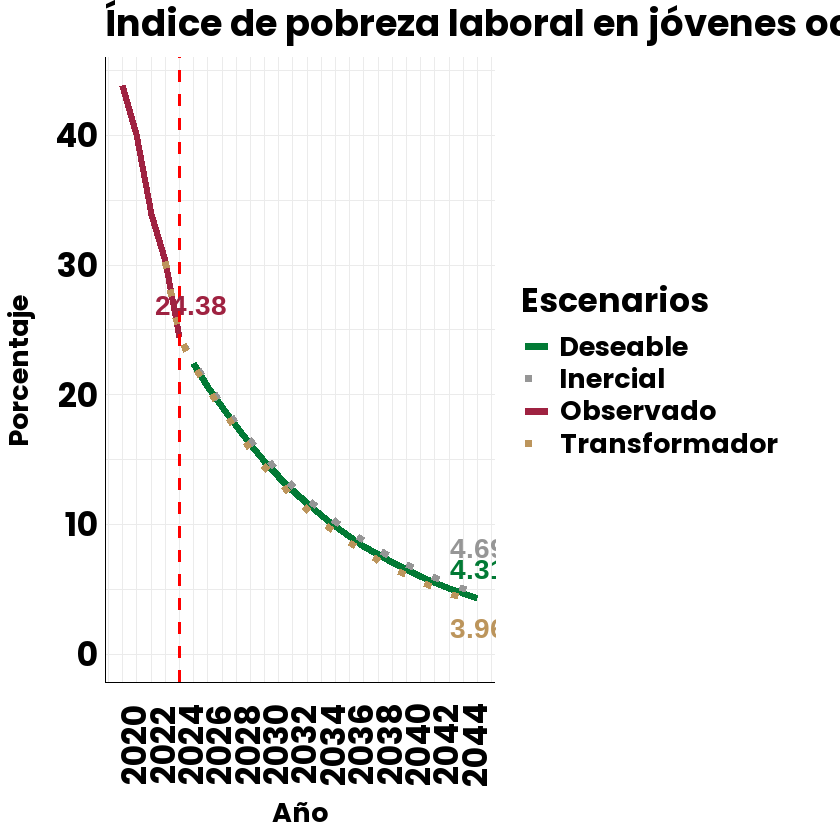

In [97]:
grafica_bonita(
  data = serie_completa,
  x = "year",
  y = "estimado",
  titulo = "Índice de pobreza laboral en jóvenes ocupados en Ciudad de México",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.8, 2.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Inercial",
  nombre_intervalo_inferior = "Transformador",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("pobreza_laboral.png",
 width = 10, height = 8.5, dpi = 185, bg = "white")